Dataset Link: http://www.robots.ox.ac.uk/~vgg/data/flowers/102/

In [1]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
import matplotlib.pyplot as plt

In [2]:
HEIGHT = 224
WIDTH = 224
BATCH_SIZE = 32

base_model = DenseNet121(weights='imagenet', 
                      include_top=False, 
                      input_shape=(HEIGHT, WIDTH, 3))

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAIN_DIR = "./flower_data/train/"
VALID_DIR = "./flower_data/valid/"



train_datagen =  ImageDataGenerator(
      preprocessing_function=preprocess_input
    )

train_generator = train_datagen.flow_from_directory(TRAIN_DIR, 
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE)

valid_datagen = ImageDataGenerator( preprocessing_function=preprocess_input
      )
valid_generator = valid_datagen.flow_from_directory(VALID_DIR, target_size=(HEIGHT,WIDTH))

Found 6552 images belonging to 102 classes.
Found 818 images belonging to 102 classes.


In [4]:
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model

def build_finetune_model(base_model, dropout, fc_layers, num_classes):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    for fc in fc_layers:
        # New FC layer, random init
        x = Dense(fc, activation='relu')(x) 
        x = Dropout(dropout)(x)

    # New softmax layer
    predictions = Dense(num_classes, activation='softmax')(x) 
    
    finetune_model = Model(inputs=base_model.input, outputs=predictions)

    return finetune_model


FC_LAYERS = [1024,256]
dropout = 0.5

finetune_model = build_finetune_model(base_model, 
                                      dropout=dropout, 
                                      fc_layers=FC_LAYERS, 
                                      num_classes=102);

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint

NUM_EPOCHS = 20

num_train_images = 6552
num_valid_images = 818

adam = SGD(lr=0.0007)
finetune_model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])

filepath="./Inception_V3.h5"
checkpoint = ModelCheckpoint(filepath, monitor=["acc"], verbose=1, mode='max')
callbacks_list = [checkpoint]

history = finetune_model.fit_generator(train_generator, validation_data=valid_generator, validation_steps= num_valid_images / BATCH_SIZE, epochs=NUM_EPOCHS, workers=8, 
                                       steps_per_epoch=num_train_images / BATCH_SIZE, 
                                       shuffle=True);





Instructions for updating:
Use tf.cast instead.
Epoch 1/20
205/205 [==============================] - 21s 104ms/step - loss: 5.0224 - acc: 0.0240 - val_loss: 4.3782 - val_acc: 0.0941
Epoch 2/20
205/205 [==============================] - 18s 87ms/step - loss: 4.3777 - acc: 0.0726 - val_loss: 4.1885 - val_acc: 0.1345
Epoch 3/20
205/205 [==============================] - 18s 87ms/step - loss: 4.0414 - acc: 0.1242 - val_loss: 3.9544 - val_acc: 0.1711
Epoch 4/20
205/205 [==============================] - 18s 88ms/step - loss: 3.6943 - acc: 0.1917 - val_loss: 3.6593 - val_acc: 0.2237
Epoch 5/20
205/205 [==============================] - 18s 88ms/step - loss: 3.3946 - acc: 0.2531 - val_loss: 3.4437 - val_acc: 0.2751
Epoch 6/20
205/205 [==============================] - 18s 89ms/step - loss: 3.0540 - acc: 0.3080 - val_loss: 3.1988 - val_acc: 0.3264
Epoch 7/20
205/205 [==============================] - 18s 88ms/step - loss: 2.7889 - acc: 0.3584 - val_loss: 2.9561 - val_acc: 0.3924
Epoch 8/20
20

In [6]:
history = finetune_model.fit_generator(train_generator, validation_data=valid_generator, validation_steps= num_valid_images / BATCH_SIZE, epochs=10, workers=8, 
                                       steps_per_epoch=num_train_images / BATCH_SIZE, 
                                       shuffle=True);


Epoch 1/10
205/205 [==============================] - 19s 91ms/step - loss: 0.8507 - acc: 0.7758 - val_loss: 1.7487 - val_acc: 0.5538
Epoch 2/10
205/205 [==============================] - 18s 88ms/step - loss: 0.8159 - acc: 0.7862 - val_loss: 1.7125 - val_acc: 0.5697
Epoch 3/10
205/205 [==============================] - 18s 88ms/step - loss: 0.7446 - acc: 0.8033 - val_loss: 1.6701 - val_acc: 0.5819
Epoch 4/10
205/205 [==============================] - 18s 88ms/step - loss: 0.6852 - acc: 0.8249 - val_loss: 1.6717 - val_acc: 0.5819
Epoch 5/10
205/205 [==============================] - 18s 88ms/step - loss: 0.6777 - acc: 0.8188 - val_loss: 1.6144 - val_acc: 0.5978
Epoch 6/10
205/205 [==============================] - 18s 88ms/step - loss: 0.6112 - acc: 0.8413 - val_loss: 1.6197 - val_acc: 0.5917
Epoch 7/10
205/205 [==============================] - 18s 88ms/step - loss: 0.5711 - acc: 0.8465 - val_loss: 1.6522 - val_acc: 0.5733
Epoch 8/10
205/205 [==============================] - 18s 88ms

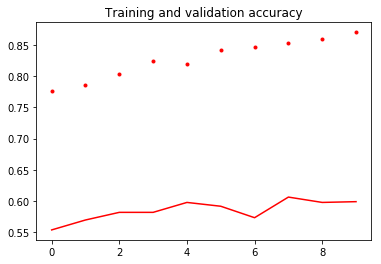

<Figure size 432x288 with 0 Axes>

In [7]:
# Plot the training and validation loss + accuracy
def plot_training(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r.')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Training and validation accuracy')

    # plt.figure()
    # plt.plot(epochs, loss, 'r.')
    # plt.plot(epochs, val_loss, 'r-')
    # plt.title('Training and validation loss')
    plt.show()

    plt.savefig('acc_vs_epochs.png')
    
    
plot_training(history)


In [13]:
test_datagen = ImageDataGenerator( preprocessing_function=preprocess_input)
TEST_DIR = "./flower_data/val/"

test_generator = test_datagen.flow_from_directory(TEST_DIR, target_size=(HEIGHT,WIDTH))

Found 818 images belonging to 102 classes.


In [14]:
finetune_model.evaluate_generator(test_generator)

[1.5480054800327008, 0.59902203]

In [15]:
finetune_model.save('./final.h5')